<a href="https://colab.research.google.com/github/sanika-3103/Crop_Prediction/blob/main/CROP_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

**Importing necessary libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import numpy as np


## **Step 1 : Data Collection**

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## **Step 2 : Data Exploration and Data Pre-processing**

**Finding inforation about the data such as :** \
1. No of Columns.
2. No of Rows.
3. No of non-null values out of total values.
4. Type of Data



In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
len(df)

2200

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**Describing the data**




In [ ]:
#Statistical overview of the data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


**Finding total categories present in the label** \
To find how many types of crops are present in the dataset

In [ ]:
df["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

**Finding total no. of categories in the label**

In [ ]:
df["label"].value_counts().count()

22

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
#if rows are duplicated or not
df.duplicated().sum()

0

## **Step 3 : Data Transformation**

#### **Feature Encoding**

In [ ]:
type("label")

str

As we have string type of data in the target variable, we need to transform it into numerical format \

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label encoder and return encoded label
label = le.fit_transform(df["label"])

# printing label
label

array([20, 20, 20, ...,  5,  5,  5])

In [ ]:
x = df.loc[:,['N','P','K','temperature','humidity','ph','rainfall']]
y = df.loc[:,'label']

## **Step 4 : Data Visualization**

***Count Plot***

Text(0.5, 1.0, 'Count of labels')

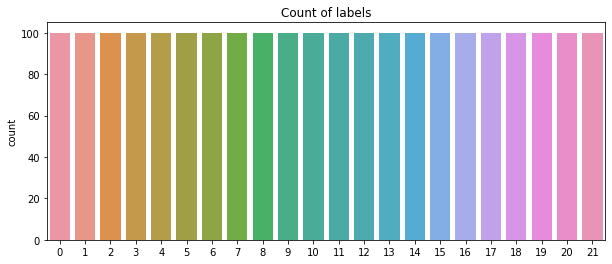

In [ ]:
#seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.figure(figsize = (10,4))
sns.countplot(x = label, data = df)
plt.title("Count of labels")

The countplot shows that each categorical variable have 100 samples in it indicating that there are 100 observations, each for all 22 crops in the dataset

**Distribution plot**

Text(0.5, 0.98, 'Frequency Distributions')

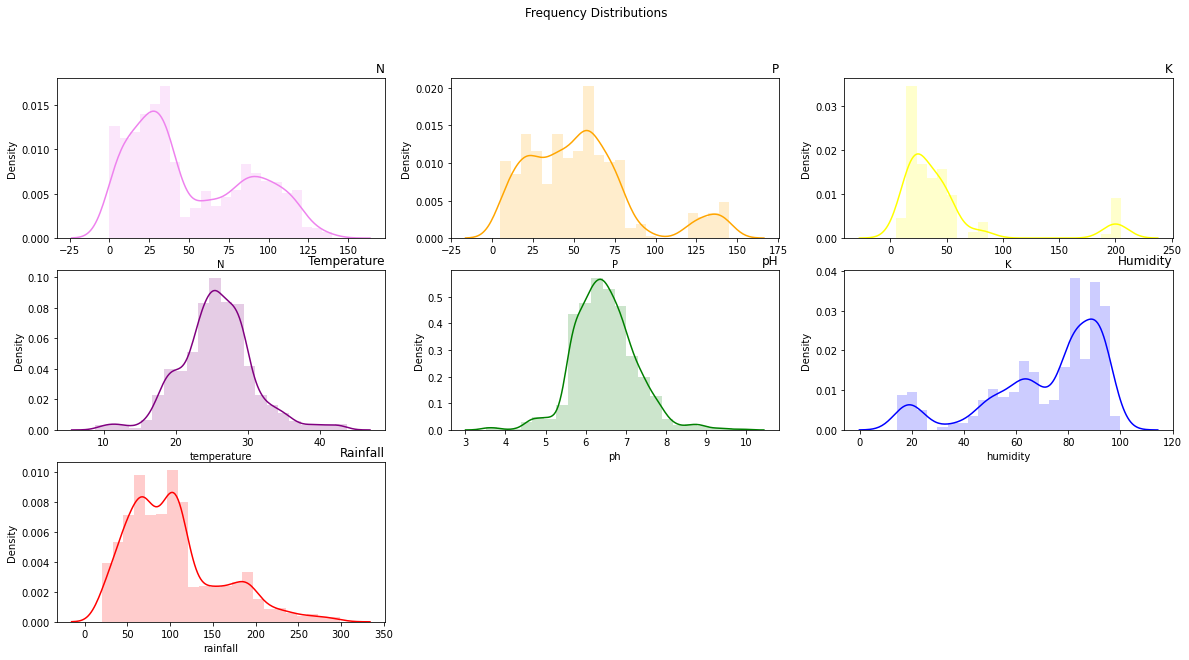

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(3, 3, 1)
plt.title("N",loc='right')
sns.distplot(df['N'],color="violet",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 2)
plt.title("P",loc='right')
sns.distplot(df['P'],color="orange",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 3)
plt.title("K",loc='right')
sns.distplot(df['K'],color="yellow",bins=22,hist_kws={'alpha':0.2})

plt.subplot(3, 3, 4)
plt.title("Temperature",loc='right')
#the figure has 2 rows, 2 columns, and this plot is the first plot.
sns.distplot(df['temperature'],color="purple",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 5)
plt.title("pH",loc='right')
sns.distplot(df['ph'],color="green",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 6)
plt.title("Humidity",loc='right')
sns.distplot(df['humidity'],color="blue",bins=22,hist_kws={'alpha':0.2})
plt.subplot(3, 3, 7)
plt.title("Rainfall",loc='right')
sns.distplot(df['rainfall'],color="red",bins=22,hist_kws={'alpha':0.2})

plt.suptitle("Frequency Distributions")

Here from these plots we can see that - \

*   Temperature and pH have Guassian(Normal) distributions that resemble each other.
*   Potassium values usually does not contain values between 100 to 180

**Feature to feature correlation**

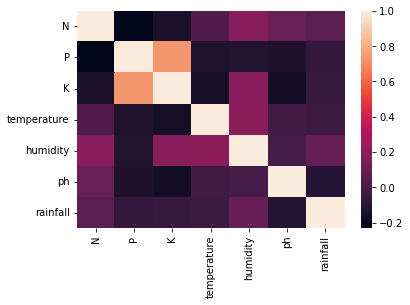

In [ ]:
sns.heatmap(x.corr())

Heatmap is often used to find correlation between the features. \
Here, we can see that Phosphorus and Potassium are highly correlated. \
So before proceeding further for feeding data to model we should scale the features.

**Feature Scaling** \

As we have seen earlier that Phosphorus (P) and Potassium (K) are highly correlated and both follow Guassian distribution. So we will use normalization method for feature scaling.

### **Data Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

This estimator scales and translates each feature individually such that it is in the given range dataset by default between zero and one.

## **Step 6 : Data Partitioning**

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3 ,random_state = 42)

## **Step 7 : Building the Model**

---



### **Naive Bayes Algorithm**

In [ ]:
classifier_nb= GaussianNB ()

#FIT GAUSSIAN MODEL
classifier_nb.fit(x_train, y_train)
GaussianNB()

#PREDICT OUTPUT FOR TEST DATA BY MODEL
y_pred_nb = classifier_nb.predict(x_test)

#ACCURACY OF THE BUILT MODEL
acc_nb = metrics.accuracy_score(y_test, y_pred_nb)*100
print("Accuracy for Naive Bayes Model is : ", acc_nb)


print(classification_report(y_test, y_pred_nb))

Accuracy for Naive Bayes Model is :  99.39393939393939
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.89      1.00      0.94        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      1.00      1.00        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00   

In [ ]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test,y_pred_nb)
print(confmat)


[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

### **Decision Tree**

In [ ]:
classifier_dt1 = DecisionTreeClassifier(random_state = 42)
classifier_dt1 = classifier_dt1.fit(x_train,y_train)

#PREDICT OUTPUT FOR TEST DATA BY MODEL
y_pred_dt1 = classifier_dt1.predict(x_test)

acc_dt1 = metrics.accuracy_score(y_test, y_pred_dt1)*100
print("Accuracy for Decision Tree Model is : ", acc_dt1)

print(classification_report(y_test, y_pred_dt1))

Accuracy for Decision Tree Model is :  98.63636363636363
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       1.00      1.00      1.00        26
   blackgram       0.96      1.00      0.98        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.86      0.94      0.90        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.94      0.97        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00 

Pruning the Decision Tree

In [ ]:
! pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


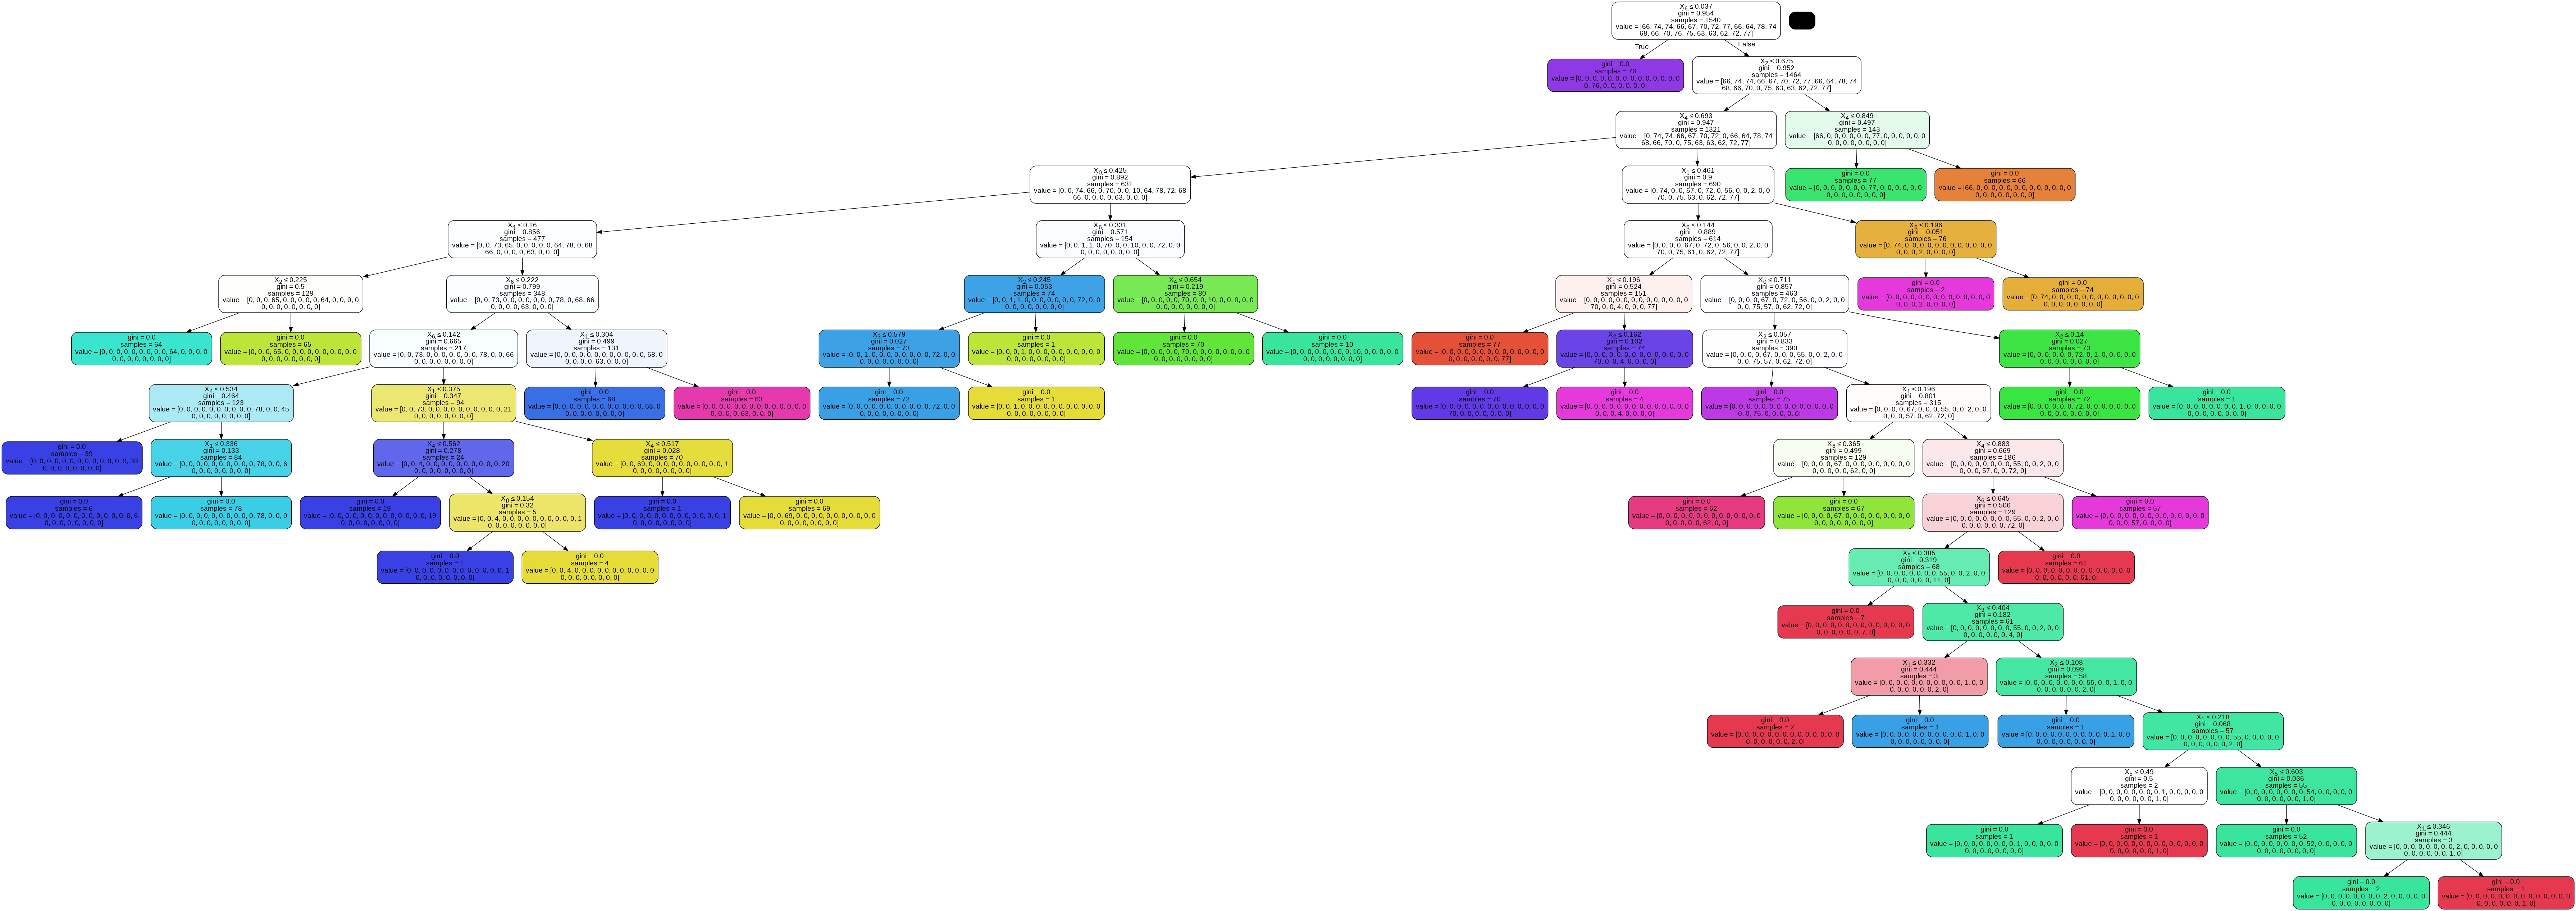

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(classifier_dt1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
classifier_dt = DecisionTreeClassifier(criterion = "entropy", max_depth =8,random_state = 42)
#PREDICT RESPONSE FOR DATASET
classifier_dt = classifier_dt.fit(x_train,y_train)
#MODEL ACCURACY
y_pred_dt = classifier_dt.predict(x_test)
acc_dt = metrics.accuracy_score(y_test, y_pred_dt)*100
print("Accuracy for Decision Tree Model is : ", acc_dt)
print(classification_report(y_test, y_pred_dt))

Accuracy for Decision Tree Model is :  98.33333333333333
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       1.00      1.00      1.00        26
    chickpea       1.00      0.97      0.99        34
     coconut       1.00      1.00      1.00        33
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        23
        jute       0.82      0.94      0.88        34
 kidneybeans       1.00      1.00      1.00        36
      lentil       0.96      1.00      0.98        22
       maize       1.00      1.00      1.00        26
       mango       1.00      1.00      1.00        32
   mothbeans       1.00      0.97      0.99        34
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00 

### **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

y_pred_dt = LogReg.predict(x_test)

acc_log= metrics.accuracy_score(y_test, y_pred_dt)*100
print("Logistic Regression's Accuracy is: ",acc_log )

Logistic Regression's Accuracy is:  92.72727272727272


## **Step 8 : Evaluating the model performance**

### **Evaluation Parameter: Accuracy**

In [ ]:
accuracies = []
models = []

accuracies.append(acc_nb)
models.append("Naive Bayes")

accuracies.append(acc_log)
models.append("Logistic Regression")

accuracies.append(acc_dt)
models.append("Decision Tree ")


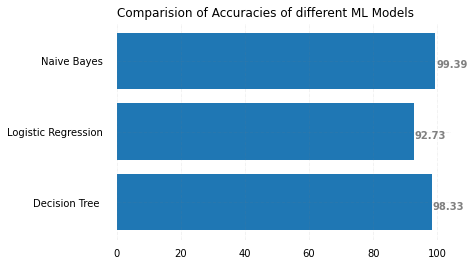

In [ ]:
# Figure Size
fig, ax = plt.subplots(figsize =(6, 4))

# Horizontal Bar Plot
ax.barh(models, accuracies)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('Comparision of Accuracies of different ML Models',
             loc ='left', )

# Show Plot
plt.show()

## **Selected ML Model is Naive Bayes**

In [ ]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = classifier_nb.predict(data)
print(prediction)

['pigeonpeas']


In [ ]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = classifier_nb.predict(data)
print(prediction)

['coffee']
